In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

import sys
sys.path.insert(0, '../')
from spiral_galaxy import Galaxy

/home/sshamsi/miniconda3/envs/marvin/lib/python3.9/site-packages/marvin/core/exceptions.py:50: UserWarning: cannot initiate Sentry error reporting: [Errno 25] Inappropriate ioctl for device.
  warnings.warn('cannot initiate Sentry error reporting: {0}.'.format(str(ee)),
[INFO]: No release version set. Setting default to MPL-11


In [2]:
plt.style.use('seaborn')
plt.style.use('seaborn-colorblind')

In [3]:
sample_paths = np.load('../Selecting_Sample/final_sample_paths.npy', allow_pickle=True)

In [4]:
gal_list = [Galaxy(path) for path in sample_paths]

In [5]:
dict_list = [gal.dic for gal in gal_list]
main_df = pd.DataFrame(dict_list)

In [6]:
avg_sp_33_sfr_list = []
sig_avg_sp_33_sfr_list = []

avg_nsp_33_sfr_list = []
sig_avg_nsp_33_sfr_list = []

gal_list_len = len(gal_list)

for idx, gal in enumerate(gal_list):
    bin_df = gal.df.dropna()
    sp_bin = bin_df[(bin_df.ha_spax_healthy == True) & (bin_df.hb_spax_healthy == True) & (bin_df.comp == False) &
                    (bin_df.agn == False) & (bin_df.seyfert == False) & (bin_df.liner == False) &
                    (bin_df.r_re >= 0.1) & (bin_df.r_re <= 1.5) & (bin_df.sp_33 == True)]
    nsp_bin = bin_df[(bin_df.ha_spax_healthy == True) & (bin_df.hb_spax_healthy == True) & (bin_df.comp == False) &
                     (bin_df.agn == False) & (bin_df.seyfert == False) & (bin_df.liner == False) &
                     (bin_df.r_re >= 0.1) & (bin_df.r_re <= 1.5) & (bin_df.nsp_33 == True)]
    
    if len(sp_bin) == 0:
        sp_sfr, sig_sp_sfr = np.nan, np.nan
    else:
        sp_sfr, sig_sp_sfr = gal.get_sfr(sp_bin.index.to_numpy(), avg=True)
        
    if len(nsp_bin) == 0:
        nsp_sfr, sig_nsp_sfr = np.nan, np.nan
    else:
        nsp_sfr, sig_nsp_sfr = gal.get_sfr(nsp_bin.index.to_numpy(), avg=True)
        
    avg_sp_33_sfr_list.append(sp_sfr)
    sig_avg_sp_33_sfr_list.append(sig_sp_sfr)
    
    avg_nsp_33_sfr_list.append(nsp_sfr)
    sig_avg_nsp_33_sfr_list.append(sig_nsp_sfr)
    
    if idx % 50 == 0:
        print(gal_list_len - idx, 'galaxies remain')

1482 galaxies remain
1432 galaxies remain
1382 galaxies remain
1332 galaxies remain
1282 galaxies remain
1232 galaxies remain
1182 galaxies remain
1132 galaxies remain
1082 galaxies remain
1032 galaxies remain
982 galaxies remain
932 galaxies remain
882 galaxies remain
832 galaxies remain
782 galaxies remain
732 galaxies remain
682 galaxies remain
632 galaxies remain
582 galaxies remain
532 galaxies remain
482 galaxies remain
432 galaxies remain
382 galaxies remain
332 galaxies remain
282 galaxies remain
232 galaxies remain
182 galaxies remain
132 galaxies remain
82 galaxies remain
32 galaxies remain


In [7]:
main_df['avg_sp_33_sfr'] = avg_sp_33_sfr_list
main_df['sig_avg_sp_33_sfr'] = sig_avg_sp_33_sfr_list

main_df['avg_nsp_33_sfr'] = avg_nsp_33_sfr_list
main_df['sig_avg_nsp_33_sfr'] = sig_avg_nsp_33_sfr_list

In [8]:
main_df['sp_sfr-nsp_sfr/nsp_sfr'] = (main_df['avg_sp_33_sfr'] - main_df['avg_nsp_33_sfr']) / main_df['avg_nsp_33_sfr']

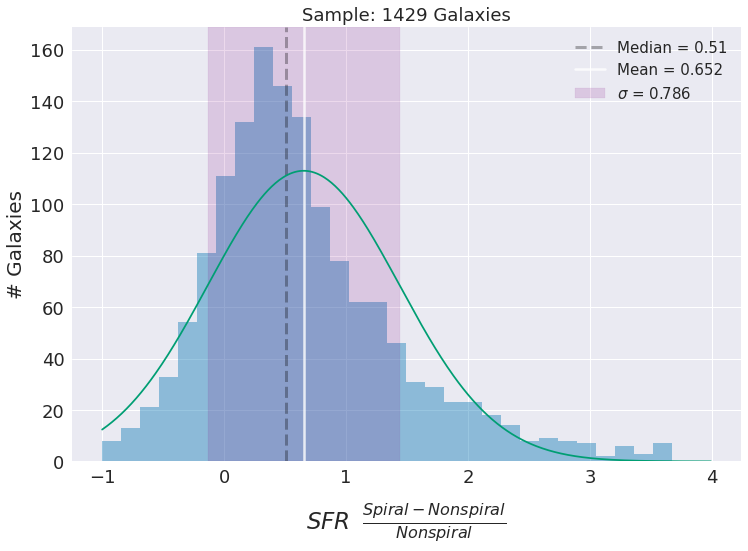

In [9]:
filtered_df = main_df.dropna()
filtered_df = filtered_df[filtered_df['sp_sfr-nsp_sfr/nsp_sfr'] < 4]
series = filtered_df['sp_sfr-nsp_sfr/nsp_sfr']

plt.figure(figsize=(12, 8))

n, b, p = plt.hist(series, bins=30, alpha=0.4)

plt.xlabel('$SFR \;\; \\frac{Spiral - Nonspiral}{Nonspiral}$', size=23, labelpad=15)
plt.ylabel('# Galaxies', size=20)

plt.xticks(size=18)
plt.yticks(size=18)

mean_series = series.mean()
median_series = series.median()
stdv_series = series.std()

plt.axvline(median_series, linestyle='--', linewidth=3, alpha=0.3, color='k',
            label='Median = {:.3}'.format(median_series))
plt.axvline(mean_series, linestyle='-', linewidth=2.5, alpha=0.8, color='white',
            label='Mean = {:.3}'.format(mean_series))
plt.axvspan(mean_series - stdv_series, mean_series + stdv_series, alpha=0.15, color='purple',
            label='$\sigma$ = {:.3}'.format(stdv_series))

A = np.diff(b)[0] * len(series)
x_axis = np.arange(-1, 4, 0.01)
plt.plot(x_axis, A * norm.pdf(x_axis, mean_series, stdv_series))

plt.title('Sample: {} Galaxies'.format(len(series)), size=18)
plt.legend(fontsize=15)